In [1]:
import pandas as pd
import numpy as np
import math
import random
from random_geometry_points.plane import Plane
from scipy import linalg as LA
import time
import matplotlib.pyplot as plt
import glob
import csv
from sklearn.cluster import KMeans

In [2]:
float1 = np.vectorize(float)

In [3]:
data = []
path1 = r'3/2+2-to-2+2-PCA.csv'

c = 0
with open(path1, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if c > 0:
            x = float1(row)
            data.append(x)
        c = c + 1
data = np.array(data)

In [4]:
Data = data[:,2:]

In [5]:
data.shape, Data.shape, data[0]

((18670, 4),
 (18670, 2),
 array([ 0.00000000e+00,  2.00904121e+13,  6.77409110e-01, -6.53722635e-01]))

In [74]:
data_1 = np.concatenate((np.arange(len(data)).reshape(-1,1), data), axis=1)
path2 = '3/2+2-to-2+2-PCA-Key_added.csv'
np.savetxt(path2, data_1, delimiter=',')

In [75]:
path3 = r'3/2+2-to-2+2-PCA-Key_added_1.csv'

header = ["key_0", "User_Name", "Trajectory_Name", "center_x", "center_y"]

with open(path2, "w", newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(header) # write the header

    # write the actual content line by line
    with open(path3, 'r', newline='') as incsv:
        reader = csv.reader(incsv)
        writer.writerows(row for row in reader)

# K-Means Clustering from K=2 to K=100

## Without indices of clusters on CSV file

### With PCA from 20 to 2 Representation, $|Q|=20$, $\sigma=0.3$

In [ ]:
Start_time = time.time()

max_num = 101
cluster_labels = [0] * (max_num -2)
cluster_centers = [0] * (max_num -2)
approx_cluster_centers = [0] * (max_num -2)

for k in range(2,max_num):

    kmeans = KMeans(n_clusters=k, random_state=0).fit(Data)
    a = kmeans.labels_ 
    centers = kmeans.cluster_centers_
    cluster_labels[k-2] = a
    cluster_centers[k-2] = centers
    approx_cluster_centers[k-2] = np.zeros((k,2))
    
    for j in range(len(kmeans.cluster_centers_)):
        l = np.argmin(np.sum((Data - centers[j])**2,1))
        approx_cluster_centers[k-2][j] = Data[l]
    
    A = np.zeros((len(kmeans.labels_), 4))
    A[:,0] = np.arange(len(kmeans.labels_))
    A[:,1] = a
    
    for i in range(k):
        I = np.where(a==i)[0]
        A[:,2][I] = approx_cluster_centers[k-2][i][0]
        A[:,3][I] = approx_cluster_centers[k-2][i][1]
               
    np.savetxt('1/Clusters_without_headers/'+str(k)+'.csv', A, delimiter=',')
    
    header = ["key_0", "k:"+str(k), "center_x_"+str(k), "center_y_"+str(k)]
    path_1 = '1/Clusters/'+str(k)+'.csv'
    path_2 = '1/Clusters_without_headers/'+str(k)+'.csv'
    
    with open(path_1, "w", newline='') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow(header) # write the header
        
        # write the actual content line by line
        with open(path_2, 'r', newline='') as incsv:
            reader = csv.reader(incsv)
            writer.writerows(row for row in reader)

print('total time =', time.time() - Start_time)

In [8]:
approx_cluster_centers

[array([[ 4.41073881e-02, -1.29531759e-04],
        [-2.23051713e-01,  4.27225484e-04]]),
 array([[-2.61046080e-01,  6.49837830e-04],
        [ 2.86282083e-03,  2.03268519e-05],
        [ 2.66223677e-01, -6.61941401e-04]]),
 array([[ 0.04950313,  0.00556263],
        [-0.28435297,  0.00093306],
        [ 0.28593675, -0.00044736],
        [-0.05285722, -0.02291802]]),
 array([[ 4.49167770e-02, -3.79602237e-03],
        [-2.84352974e-01,  9.33059125e-04],
        [ 2.85936751e-01, -4.47362378e-04],
        [-6.17832432e-02,  5.10813521e-05],
        [ 1.22246701e-02,  3.54642918e-01]]),
 array([[ 2.85936751e-01, -4.47362378e-04],
        [-6.16497685e-02,  3.07450364e-04],
        [ 4.73895137e-02, -3.55926372e-04],
        [ 1.22246701e-02,  3.54642918e-01],
        [-2.84376124e-01,  9.62444664e-04],
        [-2.01588056e-03, -3.54790940e-01]]),
 array([[-1.41727426e-02, -1.58907273e-04],
        [ 2.91812139e-01, -6.37991987e-04],
        [-2.93348672e-01,  8.82075179e-04],
        [ 

In [9]:
cluster_labels

[array([0, 0, 0, ..., 0, 1, 0], dtype=int32),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([3, 3, 0, ..., 3, 3, 3], dtype=int32),
 array([3, 3, 0, ..., 3, 3, 3], dtype=int32),
 array([1, 1, 2, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 5, ..., 0, 6, 0], dtype=int32),
 array([7, 7, 6, ..., 7, 7, 7], dtype=int32),
 array([0, 6, 1, ..., 6, 0, 0], dtype=int32),
 array([0, 0, 7, ..., 0, 6, 0], dtype=int32),
 array([ 0,  6,  9, ...,  0, 10,  0], dtype=int32),
 array([10, 10,  0, ..., 10,  1, 10], dtype=int32),
 array([9, 0, 3, ..., 9, 7, 9], dtype=int32),
 array([ 6,  6, 13, ...,  6, 12,  6], dtype=int32),
 array([ 0,  0,  7, ...,  0, 14,  0], dtype=int32),
 array([14, 14,  0, ..., 14, 12, 14], dtype=int32),
 array([1, 1, 7, ..., 1, 9, 1], dtype=int32),
 array([1, 1, 5, ..., 1, 6, 1], dtype=int32),
 array([8, 8, 9, ..., 8, 1, 8], dtype=int32),
 array([ 0,  0, 17, ...,  0,  7,  0], dtype=int32),
 array([15, 20,  9, ..., 20, 10, 15], dtype=int32),
 array([18,  6,  0, ...,  6,  1, 18], 

In [ ]:
Start_time = time.time()

x = pd.read_csv('1/Clusters/Vis_Vectors-2+20-to-2+2-dim-larger-than-1-trajs-all-in-1-file-headed.csv')
y = pd.read_csv('1/Clusters/'+str(2)+".csv")
y = y.dropna(axis=1)
merged = pd.merge(x, y, on= np.arange(18663)) 
merged.to_csv("1/final_data.csv", index=False)
x = pd.read_csv('1/final_data.csv')

for k in range(3, max_num):
    y = pd.read_csv('1/Clusters/'+str(k)+".csv")
    y = y.dropna(axis=1)
    merged = pd.merge(x, y, on = 'key_0')
    merged.to_csv("1/final_data.csv", index=False)
    x = pd.read_csv("1/final_data.csv")
    
print('total time =', time.time() - Start_time)

In [16]:
# This is done for two copied versions on desktop
x = pd.read_csv('/Users/hasan/Desktop/2.csv')
y = pd.read_csv('/Users/hasan/Desktop/data_final_2.csv')
y = y.dropna(axis=1)
merged = pd.merge(x, y, on= np.arange(18663))
merged.to_csv('/Users/hasan/Desktop/final_data_2.csv', index=False)

x = pd.read_csv('/Users/hasan/Desktop/2.csv')
y = pd.read_csv('/Users/hasan/Desktop/data_final_2.csv')
y = y.dropna(axis=1)
#merged = pd.merge(x, y, on= np.arange(18663))
merged = pd.merge(x, y, on= 'key_0')
merged.to_csv('/Users/hasan/Desktop/final_data_2.csv', index=False)

# Adding indices of cluster centers

In [26]:
Start_time = time.time()

max_num = 101
cluster_labels = [0] * (max_num -2)
cluster_centers = [0] * (max_num -2)
approx_cluster_centers = [0] * (max_num -2)

for k in range(2,max_num):

    kmeans = KMeans(n_clusters=k, random_state=0).fit(Data)
    a = kmeans.labels_ 
    centers = kmeans.cluster_centers_
    cluster_labels[k-2] = a
    cluster_centers[k-2] = centers
    approx_cluster_centers[k-2] = np.zeros((k,3))
    
    for j in range(len(kmeans.cluster_centers_)):
        l = np.argmin(np.sum((Data - centers[j])**2,1))
        approx_cluster_centers[k-2][j][:2] = Data[l]
        approx_cluster_centers[k-2][j][2] = l
    
    A = np.zeros((len(kmeans.labels_), 5))
    A[:,0] = np.arange(len(kmeans.labels_))
    A[:,1] = a
    
    for i in range(k):
        I = np.where(a==i)[0]
        A[:,2][I] = approx_cluster_centers[k-2][i][0]
        A[:,3][I] = approx_cluster_centers[k-2][i][1]
        A[:,4][I] = approx_cluster_centers[k-2][i][2]
               
    np.savetxt('2/Clusters_without_headers/'+str(k)+'.csv', A, delimiter=',')
    
    header = ["key_0", "k:"+str(k), "center_x_"+str(k), "center_y_"+str(k), 'center_index'+str(k)]
    path_1 = '2/Clusters/'+str(k)+'.csv'
    path_2 = '2/Clusters_without_headers/'+str(k)+'.csv'
    
    with open(path_1, "w", newline='') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow(header) # write the header
        
        # write the actual content line by line
        with open(path_2, 'r', newline='') as incsv:
            reader = csv.reader(incsv)
            writer.writerows(row for row in reader)

print('total time =', time.time() - Start_time)

total time = 133.6321840286255


In [ ]:
Start_time = time.time()

x = pd.read_csv('2/Clusters/Vis_Vectors-2+20-to-2+2-dim-larger-than-1-trajs-all-in-1-file-headed.csv')
y = pd.read_csv('2/Clusters/'+str(2)+".csv")
y = y.dropna(axis=1)
merged = pd.merge(x, y, on= np.arange(18663)) 
merged.to_csv("2/final_data.csv", index=False)
x = pd.read_csv('2/final_data.csv')

for k in range(3, max_num):
    y = pd.read_csv('2/Clusters/'+str(k)+".csv")
    y = y.dropna(axis=1)
    merged = pd.merge(x, y, on = 'key_0')
    merged.to_csv("2/final_data.csv", index=False)
    x = pd.read_csv("2/final_data.csv")
    
print('total time =', time.time() - Start_time)

In [28]:
# if abov box worked, delete this box
Start_time = time.time()

x = pd.read_csv('2/Clusters/'+str(2)+".csv")

for k in range(3, max_num):
    y = pd.read_csv('2/Clusters/'+str(k)+".csv")
    y = y.dropna(axis=1)
    merged = pd.merge(x, y, on = 'key_0')
    merged.to_csv("2/final_data.csv", index=False)
    x = pd.read_csv("2/final_data.csv")
    
print('total time =', time.time() - Start_time)

total time = 404.2097370624542


# Plotting

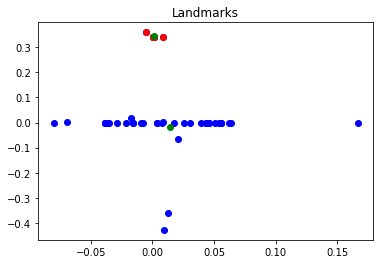

In [80]:
plt.plot(Data[:,0], Data[:,1], 'bo')
plt.plot(Data[I][:,0], Data[I][:,1], 'ro')
plt.plot([ 0.00108177, 0.01425375], [0.34502564 , -0.0191695 ], 'go')

plt.title("Landmarks" , color='black')
plt.show()

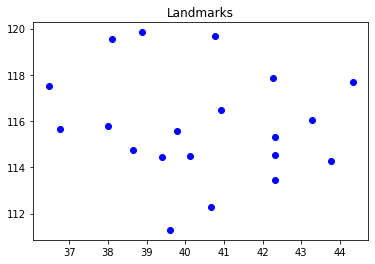

In [31]:
plt.plot(Q[:,0], Q[:,1], 'bo')
plt.title("Landmarks" , color='black')
plt.show()